Zomato data analysis project

1. Importing Libraries 

In [12]:
!pip install matplotlib 
!pip install seaborn


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 325.1 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.9 kB 326.8 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 573.4 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.9 kB 573.4 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 374.1 kB/s eta 0:00:01
     -----------------------------------  163.8/165.9 kB 544.7 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 497.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 660.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/7.8 MB 787.7 kB/s eta 0:00:10
   ---------------------------------------- 0.1/7.8 MB 787.7 kB/s et


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 328.2 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 357.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 350.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 350.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 350.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 350.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 350.1 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 350.1 kB/


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd # used for data manipulation and analysis 
import numpy as np #used for numerical operation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns # data visualization 

2. Create dataframe and read the data 

In [3]:
df  = pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


3. Convert the data type of column rate 

In [19]:
#df['rate'].dtype

def handle_rate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df['rate']= df['rate'].apply(handle_rate)
print(df.head())
    

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [20]:
#check if there missing values or not null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


4. Type of restaurant 

Text(0.5, 0, 'Type of restaurant')

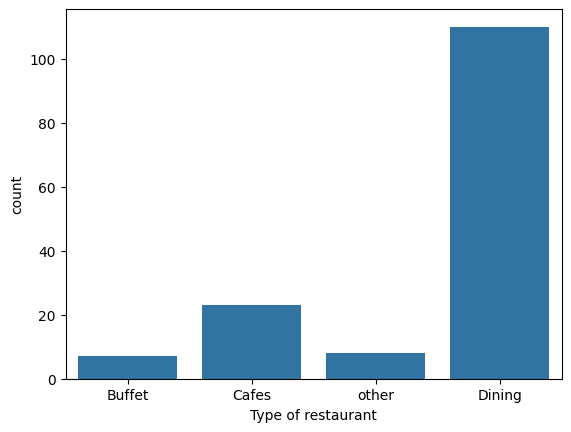

In [21]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('Type of restaurant')


5. which type of restaurant has higher rating 

Text(0, 0.5, 'Votes')

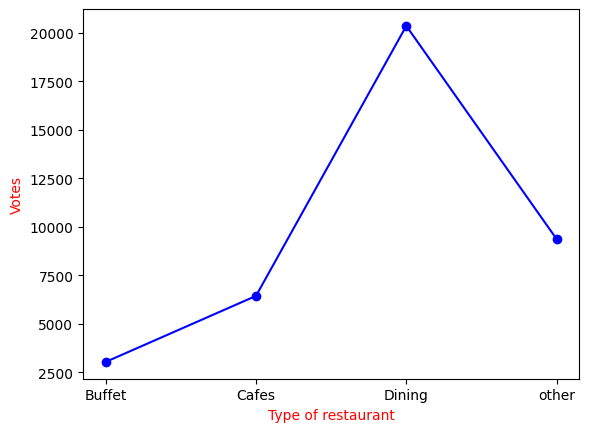

In [33]:
#df.head()
grouped_data  =  df.groupby('listed_in(type)')['votes'].sum()
result =  pd.DataFrame({'votes':grouped_data})
plt.plot(result, c = "blue",marker = "o")
plt.xlabel("Type of restaurant", c="red", size=10)
plt.ylabel("Votes",c="red",size=10)


6. what are the ratings that the majority of reastaurants have received?

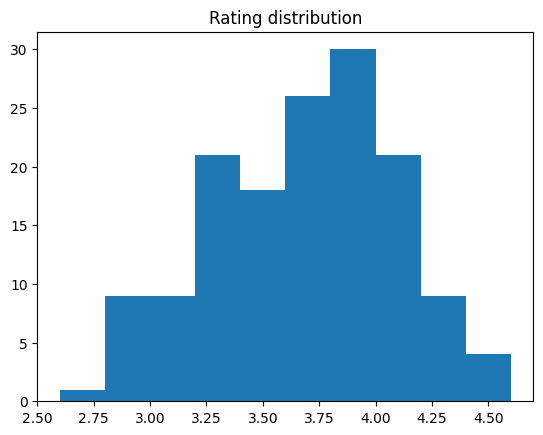

In [44]:
plt.hist(df['rate'], bins = 10 )
plt.title("Rating distribution")
plt.show()

Conclusion - Majority resturant received ratings from 3.5 to 4

7. Most couples order most of their food online, what is their average spending on each order?

Text(0.5, 0, 'Cost for two people')

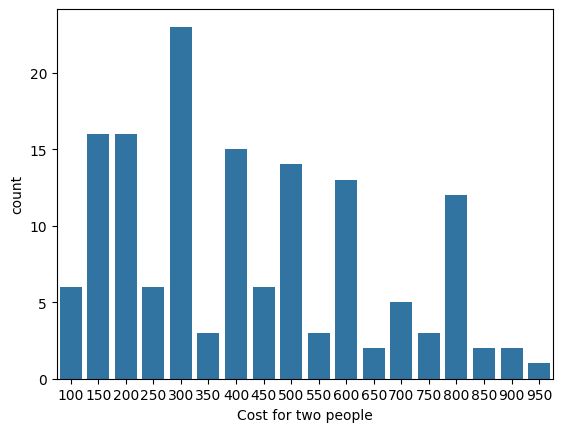

In [48]:
df.head()
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.xlabel('Cost for two people')


Conclusion - The majority of people prefer restaurant with an approximate cost of 300 Rs

8. Which mode( Online or Offline) has received the maxximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

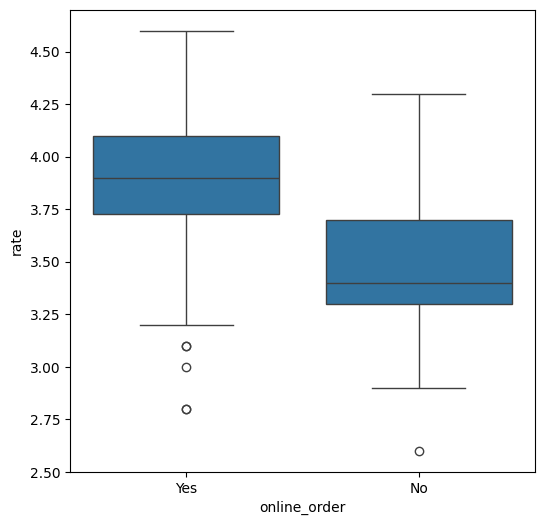

In [50]:
df.head()
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data= df)


CONCLUSION - Offline order has low rating compare to online rating 

9. which restaurant recieved more offline orders

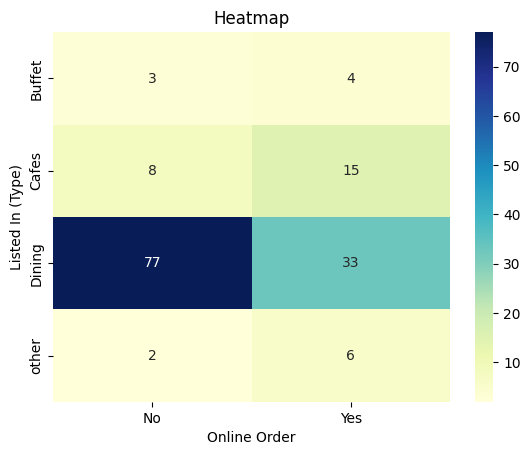

In [62]:
pivot_table =  df.pivot_table(index = 'listed_in(type)',  columns = 'online_order', aggfunc = 'size', fill_value =0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


Conclusion - dining restuarnt accept offline orders, whereas cafes receive online orders